In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Air_quality_prediction_data.csv')

In [3]:
data = data.drop(columns=["Unnamed: 0"])


In [4]:
data.head(5)

,From Date,To Date,PM2.5,BP,RH,WD,WS,CO,NO2,Ozone,SO2,TEMPARATURE
0,01-01-2018 00:00,02-01-2018 00:00,488.62,733.0,71.69,140.80,0.32,3.72,87.65,27.74,21.69,12.5
1,02-01-2018 00:00,03-01-2018 00:00,360.76,733.0,71.90,197.44,0.34,3.93,83.98,33.83,23.63,11.8
2,03-01-2018 00:00,04-01-2018 00:00,288.57,733.0,67.30,248.62,0.32,2.12,87.43,29.08,20.43,11.1
3,04-01-2018 00:00,05-01-2018 00:00,352.22,733.0,69.67,151.16,0.76,1.28,92.08,35.48,21.95,10.9
4,05-01-2018 00:00,06-01-2018 00:00,305.94,733.0,67.91,105.28,0.80,2.67,82.24,29.00,21.69,11.7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   From Date    2556 non-null   object 
 1   To Date      2556 non-null   object 
 2   PM2.5        2437 non-null   float64
 3   BP           2303 non-null   float64
 4   RH           2440 non-null   float64
 5   WD           2441 non-null   float64
 6   WS           2432 non-null   float64
 7   CO           2381 non-null   float64
 8   NO2          2412 non-null   float64
 9   Ozone        2427 non-null   float64
 10  SO2          2418 non-null   float64
 11  TEMPARATURE  2556 non-null   float64
dtypes: float64(10), object(2)
memory usage: 239.8+ KB


In [6]:
data.describe()

,PM2.5,BP,RH,WD,WS,CO,NO2,Ozone,SO2,TEMPARATURE
count,2437.000000,2303.000000,2440.000000,2441.000000,2432.000000,2381.000000,2412.000000,2427.000000,2418.00000,2556.000000
mean,130.956057,916.373383,58.287709,168.200688,0.914091,2.166947,81.195879,32.322909,16.29995,25.216197
std,98.928938,102.516201,16.398249,72.117875,0.615905,0.958391,44.053811,21.998283,9.20192,7.362275
min,8.000000,715.950000,2.500000,1.750000,0.300000,0.030000,0.800000,0.500000,0.50000,6.500000
25%,57.170000,919.640000,49.230000,104.330000,0.470000,1.560000,49.357500,16.650000,9.35750,18.775000
50%,97.850000,972.710000,59.400000,172.840000,0.730000,1.970000,75.735000,26.320000,15.54000,27.400000
75%,176.430000,974.310000,69.462500,232.740000,1.160000,2.620000,105.637500,41.960000,21.50000,30.900000
max,672.880000,998.120000,94.210000,359.000000,4.780000,10.140000,364.900000,178.790000,95.34000,39.500000


In [7]:
## Data Cleaning
# Check missing values
print("Missing values before handling:\n", data.isnull().sum())


num_cols = ["PM2.5", "BP", "RH", "WS", "CO", "NO2", "Ozone", "SO2", "TEMPARATURE"]
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

data["WD"] = data["WD"].fillna(data["WD"].mode()[0])


print("\nMissing values after handling:\n", data.isnull().sum())


Missing values before handling:
 From Date        0
To Date          0
PM2.5          119
BP             253
RH             116
WD             115
WS             124
CO             175
NO2            144
Ozone          129
SO2            138
TEMPARATURE      0
dtype: int64

Missing values after handling:
 From Date      0
To Date        0
PM2.5          0
BP             0
RH             0
WD             0
WS             0
CO             0
NO2            0
Ozone          0
SO2            0
TEMPARATURE    0
dtype: int64


In [8]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

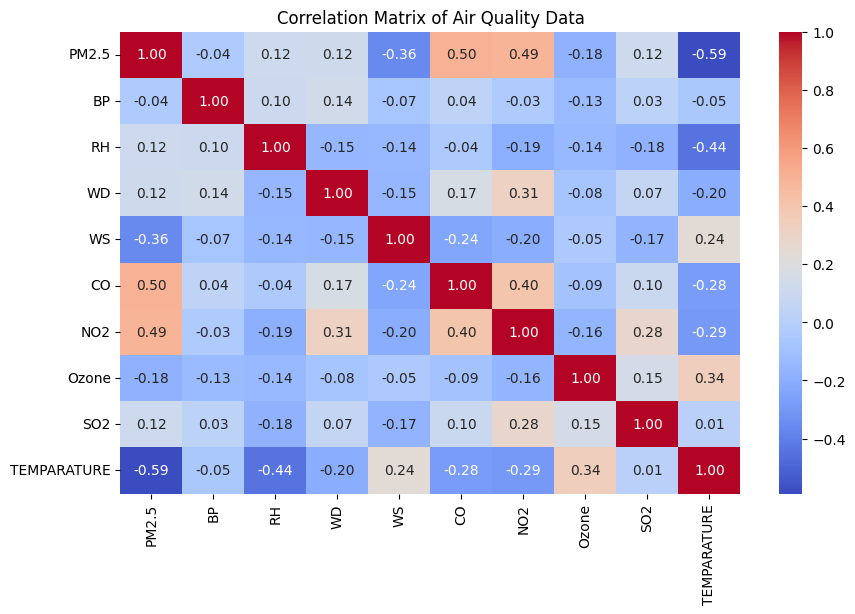

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Air Quality Data")
plt.show()


In [10]:
import pandas as pd


# Convert From Date and To Date to datetime
data['From Date'] = pd.to_datetime(data['From Date'], errors='coerce')
data['To Date'] = pd.to_datetime(data['To Date'], errors='coerce')

# Extract year, month, day, hour from 'From Date'
data['from_year'] = data['From Date'].dt.year
data['from_month'] = data['From Date'].dt.month
data['from_day'] = data['From Date'].dt.day


# Extract year, month, day, hour from 'To Date'
data['to_year'] = data['To Date'].dt.year
data['to_month'] = data['To Date'].dt.month
data['to_day'] = data['To Date'].dt.day






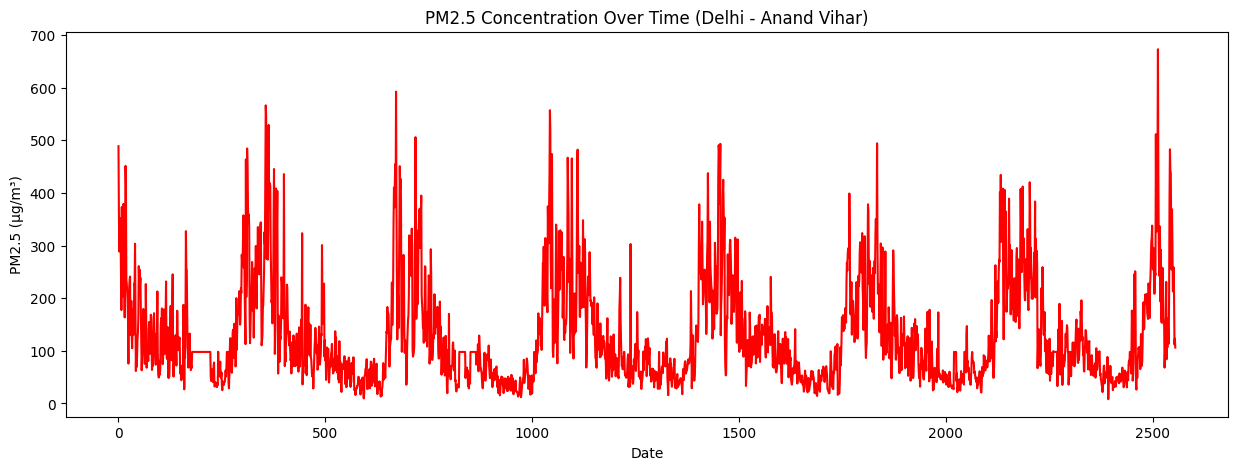

In [11]:
## Time-Series Trend of PM2.5
plt.figure(figsize=(15,5))
data["PM2.5"].plot(color="red")
plt.title("PM2.5 Concentration Over Time (Delhi - Anand Vihar)")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("Date")
plt.show()


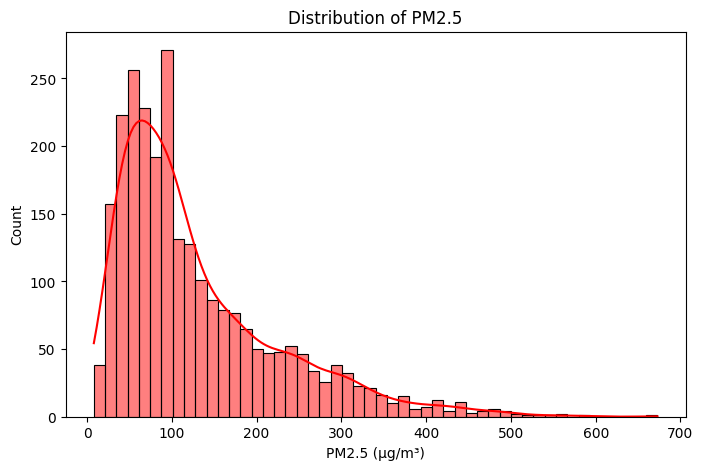

In [12]:
## Distribution of PM2.5
plt.figure(figsize=(8,5))
sns.histplot(data["PM2.5"].dropna(), bins=50, kde=True, color="red")
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5 (µg/m³)")
plt.show()

Text(0, 0.5, 'CO')

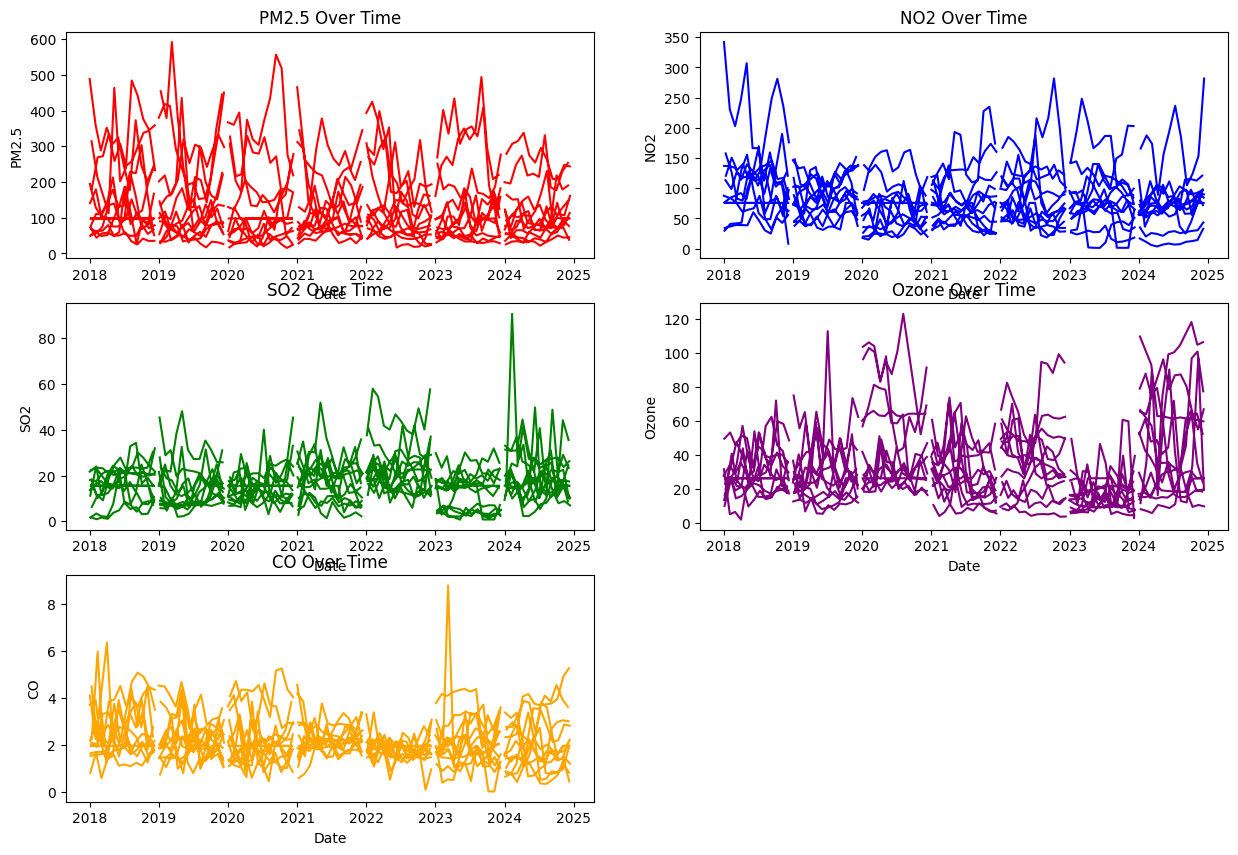

In [13]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.plot(data['From Date'], data['PM2.5'], color='red')
plt.title('PM2.5 Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')

plt.subplot(3, 2, 2)
plt.plot(data['From Date'], data['NO2'], color='blue')
plt.title('NO2 Over Time')
plt.xlabel('Date')
plt.ylabel('NO2')

plt.subplot(3, 2, 3)
plt.plot(data['From Date'], data['SO2'], color='green')
plt.title('SO2 Over Time')
plt.xlabel('Date')
plt.ylabel('SO2')

plt.subplot(3, 2, 4)
plt.plot(data['From Date'], data['Ozone'], color='purple')
plt.title('Ozone Over Time')
plt.xlabel('Date')
plt.ylabel('Ozone')

plt.subplot(3, 2, 5)
plt.plot(data['From Date'], data['CO'], color='orange')
plt.title('CO Over Time')
plt.xlabel('Date')
plt.ylabel('CO')


In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score


In [15]:
# Clean column names
data.columns = data.columns.str.strip()

# Now split X and y properly
X = data.drop(['PM2.5','From Date','To Date'],axis=1)
y = data['PM2.5']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values (imputation)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Candidate models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "SVR": SVR(),
    "Linear Regression": LinearRegression()
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

# Comparison table
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
print(results_df.sort_values(by="R²", ascending=False))



               Model        MAE       RMSE        R²
1            XGBoost  30.094648  44.019898  0.782429
0      Random Forest  31.107814  47.446803  0.747235
3  Linear Regression  46.433485  64.806585  0.528435
2                SVR  65.004375  97.787281 -0.073663


In [24]:
# Model Training without Hyperparameter tuning
model = RandomForestRegressor(random_state=42) 
model.fit(X_train, y_train) 
y_prediction = model.predict(X_test) 
 
#Evaluation Metrics  
def evaluate_model(y_true, y_prediction, label=''): 
    print(f"\n Evaluation Metrics {label}")  
    r2 = r2_score(y_true, y_prediction) 
    rmse = np.sqrt(mean_squared_error(y_true, y_prediction)) 
    mae = mean_absolute_error(y_true, y_prediction) 
    mse = mean_squared_error(y_true, y_prediction)  
    accuracy = 1 - (mae / np.mean(y_true))
 
    print(f"R² Score: {r2:.4f}") 
    print(f"RMSE: {rmse:.4f}") 
    print(f"MAE: {mae:.4f}") 
    print(f"MSE: {mse:.4f}") 
    print(f"Accuracy   : {accuracy*100:.2f}%")
    return r2, rmse, mae, mse,accuracy
 
evaluate_model(y_test, y_prediction, label="Before Hyperparameter Tuning") 
 


 Evaluation Metrics Before Hyperparameter Tuning
R² Score: 0.7472
RMSE: 47.4468
MAE: 31.1078
MSE: 2251.1991
Accuracy   : 75.12%


(0.7472348368216708,
 np.float64(47.44680270021454),
 31.107814062500008,
 2251.199086473086,
 np.float64(0.7511947127160752))

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Base XGBoost model
xgb = XGBRegressor(random_state=42, verbosity=0)

# Parameter grid (smaller than full grid)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,             # Number of random combinations to try
    scoring='r2',          # You can also use 'neg_root_mean_squared_error'
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit model (make sure X_train, X_test have no NaNs)
random_search.fit(X_train, y_train,
                  verbose=False)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.7, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], ...}"
,n_iter,50
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [20]:
# Best parameters
print("Best parameters:", random_search.best_params_)
print("Best CV R²:", random_search.best_score_)



print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R²:", r2_score(y_test, y_pred))


Best parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best CV R²: 0.7766873825931175
Test MAE: 29.08467672765255
Test RMSE: 43.02442665969816
Test R²: 0.7921579116279883


In [22]:
# Evaluate on test set
best_xgb = random_search.best_estimator_
 
print("\n Best Hyperparameters Found:\n", random_search.best_params_) 


 Best Hyperparameters Found:
 {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}


In [27]:
y_pred_best = best_xgb.predict(X_test)
evaluate_model(y_test, y_pred_best, label="After Hyperparameter Tuning") 


 Evaluation Metrics After Hyperparameter Tuning
R² Score: 0.7922
RMSE: 43.0244
MAE: 29.0847
MSE: 1851.1013
Accuracy   : 76.74%


(0.7921579116279883,
 np.float64(43.02442665969816),
 29.08467672765255,
 1851.1012893957457,
 np.float64(0.7673760896781536))

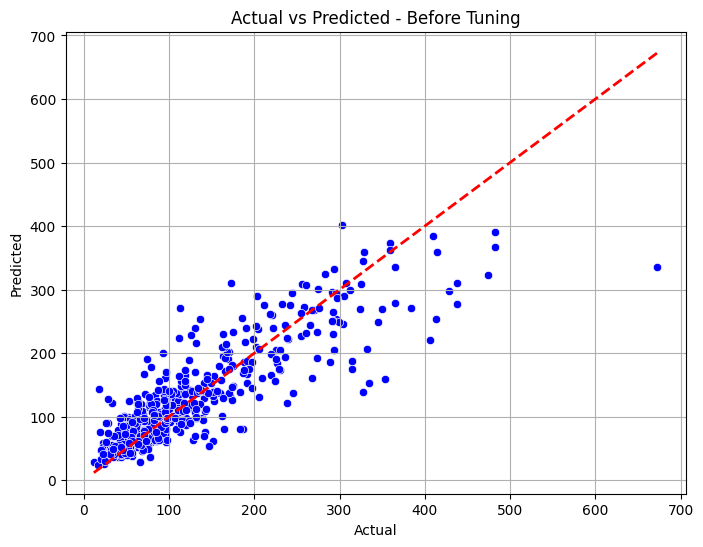

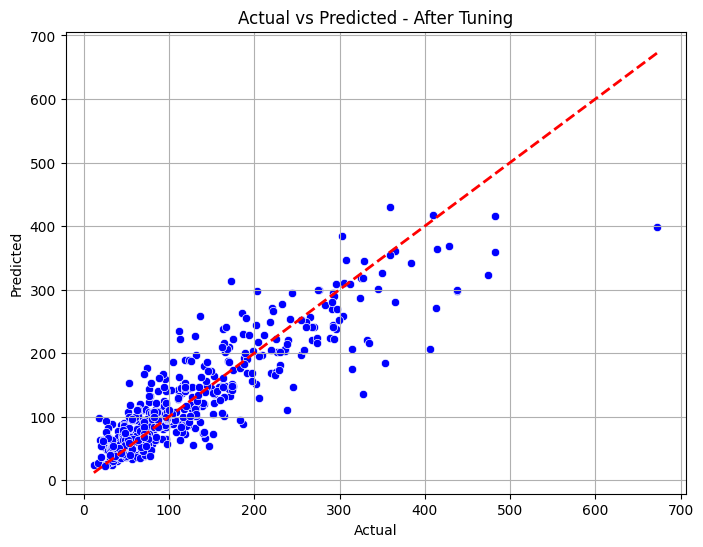

In [28]:
#Evaluation Metrics
def plot_predictions(y_true, y_prediction, title=''): 
    plt.figure(figsize=(8, 6)) 
    sns.scatterplot(x=y_true, y=y_prediction, color='blue') 
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2) 
    plt.xlabel('Actual') 
    plt.ylabel('Predicted') 
    plt.title(f'Actual vs Predicted - {title}')  
    plt.grid(True) 
    plt.show() 
 
plot_predictions(y_test, y_prediction, "Before Tuning")  
plot_predictions(y_test, y_pred_best, "After Tuning")

In [32]:
#Cross Validation   
cv = KFold(n_splits=5, shuffle=True, random_state=42) 
cross_validation_scores = cross_val_score(best_xgb, X, y, cv=cv, scoring='r2') 
print("\n Cross-validation R² Scores:", cross_validation_scores) 
print("Mean CV R² Score:", np.mean(cross_validation_scores)) 
 
  



 Cross-validation R² Scores: [0.79114708 0.81947546 0.8122213  0.80244114 0.75905084]
Mean CV R² Score: 0.7968671621713207


In [39]:
# Make sure future_data has the same columns as X_train
future_data = pd.DataFrame({
    'BP': [120, 118, 122],
    'RH': [45, 50, 48],
    'WD': [90, 85, 80],
    'WS': [5, 6, 4],
    'CO': [0.8, 0.7, 0.9],
    'NO2': [40, 42, 38],
    'Ozone': [30, 28, 35],
    'SO2': [10, 12, 11],
    'TEMPARATURE': [32, 31, 30],
    'from_year': [2025, 2025, 2025],
    'from_month': [8, 8, 8],
    'from_day': [16, 17, 18],
    'to_year': [2025, 2025, 2025],
    'to_month': [8, 8, 8],
    'to_day': [16, 17, 18],
    
})

# Predict
future_predictions = best_xgb.predict(future_data)
print("Future PM2.5 predictions:", future_predictions)


Future PM2.5 predictions: [87.239075 92.22441  94.25415 ]


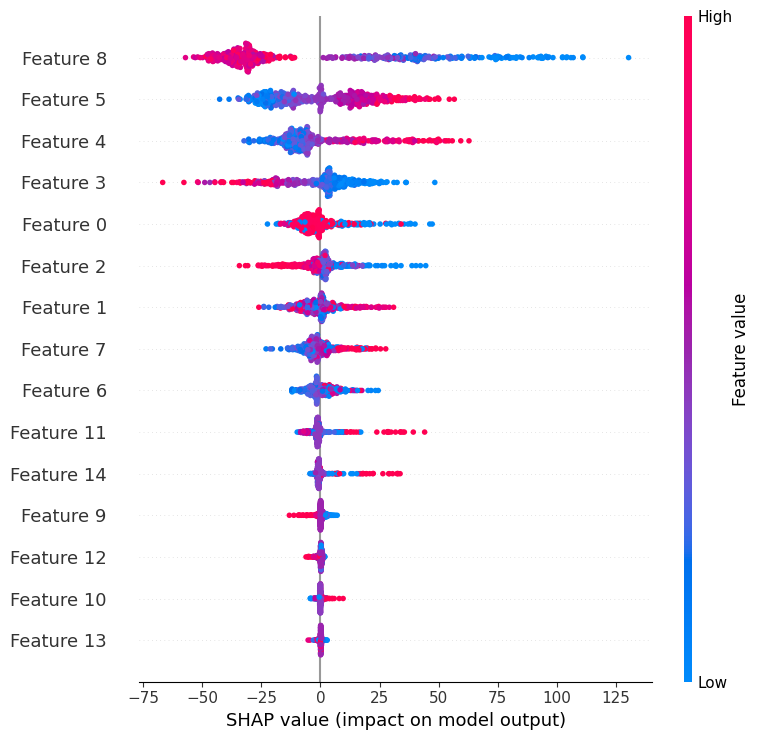

In [43]:
import shap


explainer = shap.TreeExplainer(best_xgb)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)


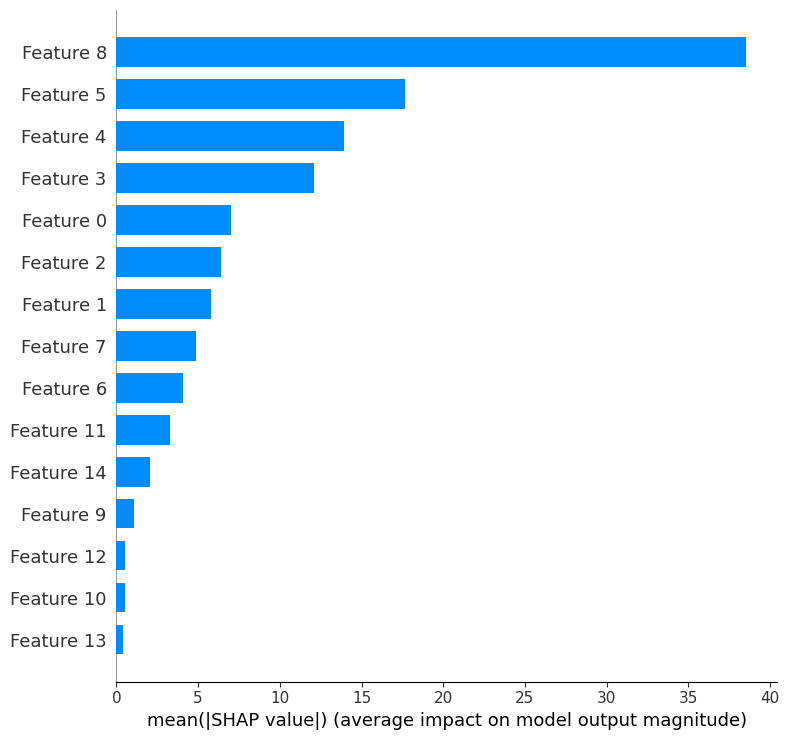

In [44]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


### PICKLING THE MODEL FILE FOR DEPLOYMENT

In [45]:
import pickle

# Suppose 'best_model' is your trained model
with open("pm2.5_model.pkl", "wb") as file:
    pickle.dump(best_xgb, file)
